Pierwszym krokiem będzie zaimplementowanie sieci neuronowej na używanym wcześniej zestawie Fashion-Mnist tak, aby uzyskać wynik na danych testowych rzędu accuracy > 0.94 (albo jak najbardziej zbliżony), używając poniższego podziału:

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)
    
Drugim krokiem będzie zapisanie i dostarczenie modelu oraz napisanie interfejsu, który przyjmuje wartość wejściową oraz zwraca wartość przewidzianą przez nasz model wraz z wyrysowanym obrazem wejściowym (aby można było zweryfikować wizualnie, czy działa).

W kursie nie mówiliśmy jak tego dokonać, choć zapisywanie modeli jest opisane na stronie TensorFlow. Mentorzy z chęcią pomogą, lecz zachęcamy do odkrycia, jak to zrobić samemu.

Trzecim krokiem będzie podbicie naszego wyniku do około 0.97 poprzez użycie technik augumentacji, czyli tworzenia nowy danych na bazie danych już istniejących. Jest to przydatna technika, o którą pytanie pojawia się podczas rozmów o pracę :)

Będzie to relatywnie trudne, gdyż posiadamy mało danych treningowych, więc należy zrobić mały "research" w poszukiwaniu informacji, jak takie dane sobie wygenerować.

Polecamy szczególnie:

Albumentation library
Open CV library
Ten kurs ma pokazywać, jak w rzeczywistości pracuje się z TensorFlow, a realia są takie, że bardzo często większość pracy to odkrywanie nowych rzeczy. Dlatego podajemy tylko linki do bibliotek – jak należy ich użyć, trzeba wywnioskować samemu :)

# Import Bibliotek

In [65]:
# Podstawy

import pandas as pd
import numpy as np

In [66]:
# Wizualizacja

import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Import danych

from keras.datasets import fashion_mnist

In [68]:
# Sieci neuronowe

import tensorflow as tf
from sklearn.model_selection import train_test_split
import os

In [69]:
# Metryki

from sklearn.metrics import f1_score, confusion_matrix

In [70]:
# Albumentacja
import albumentations as A
import cv2

# Import i obróbka Danych

In [71]:
train, test = fashion_mnist.load_data()
images, labels = train

images = images/255.0

labels = labels.astype(np.int32)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [73]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [74]:
train_ds = train_ds.shuffle(1000).batch(32)

Klasy oraz ich nazwy

Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

# Tworzenie modelu

In [75]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16, activation='relu', name="input_layer"),
        tf.keras.layers.Dense(64, activation='relu', name="hidden_layer_1"),
        tf.keras.layers.Dense(32, activation='relu', name="hidden_layer_2"),
        tf.keras.layers.Dense(10, activation='softmax', name="output_layer")
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Zapisujemy wagi za każdym razem kiedy model oszacuje lepsze od poprzednich.

In [76]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_best_only=True,
                                                 monitor='val_accuracy')

# Szkolenie modelu

In [77]:
model_fashion = create_model()

stats = model_fashion.fit(train_ds, epochs=10, verbose=1, callbacks=[cp_callback])

Epoch 1/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.5978 - accuracy: 0.7892
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4212 - accuracy: 0.8495
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3850 - accuracy: 0.8601
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3654 - accuracy: 0.8673
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3506 - accuracy: 0.8717
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3364 - accuracy: 0.8764
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3283 - accuracy: 0.8792
Epoch 8/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3191 - accuracy: 0.8815
Epoch 9/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3107 - accuracy: 0.8857
Epoch 10/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.306

Model widocznie zwolnił po trzeciej epoce. Podnosząc liczbę epok doszedłbym do wyniku accuracy na poziomie 0.94.

Odpalę model jeszcze raz, żeby przeleciał ponownie. Powinienem uzyskać wyższy wynik.

In [78]:
stats = model_fashion.fit(train_ds, epochs=10, verbose=1, callbacks=[cp_callback])

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2976 - accuracy: 0.8889
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2961 - accuracy: 0.8892
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2887 - accuracy: 0.8924
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.8934
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.8956
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.8971
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2706 - accuracy: 0.8965
Epoch 8/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2675 - accuracy: 0.8992
Epoch 9/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.8984
Epoch 10/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.261

Wynik został podniesiony o 1,5%. Działanie to było bezcelowe, mogłem po prostu zwiększyć ilość epok przy pierwszym treningu.

Zapisujemy model

In [79]:
!mkdir -p saved_model
model_fashion.save('saved_model/model_fashion')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/model_fashion\assets


# Ewalucja modelu

In [80]:
def evaluate_model(model, X_test, y_test, stats):
    
    # Numeryczne predykcje
    y_pred = model_fashion.predict(X_test)
    print("probs : ", y_pred[2])
    print("klasa :", np.argmax(y_pred[2]))
    print("rzeczywista klasa: ", y_test[2])
    
    # Wizualizacja wyników treningu modelu
    pd.DataFrame(stats.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
    # Mierzymy F1 Score
    y_pred = np.argmax(y_pred,axis=1)
    scores = f1_score(y_test, y_pred, average='macro')
    print(f'F1 Score modelu to {scores}')
    
    # Dodajmy heatmap składającą się z błędnych predykcji modelu, żeby zobaczyć z którymi obrazami nasz model ma problem
    conf_mx = confusion_matrix(y_test, y_pred)
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(conf_mx, cmap='Dark2')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Właściwy obraz etykiety
    plt.imshow(np.array(X_test[2]))
    plt.title('Właściwy obraz')
    plt.title(y_test[2])

188/188 [==============================] - 0s 979us/step
probs :  [1.1034963e-06 6.2640680e-08 6.0364113e-05 1.6442084e-09 2.6003090e-07
 2.2643225e-04 4.1734990e-07 9.9968982e-01 1.3424043e-05 8.1033313e-06]
klasa : 7
rzeczywista klasa:  7


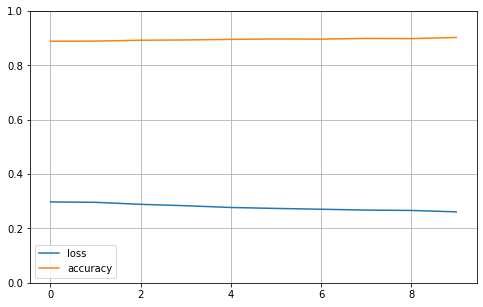

F1 Score modelu to 0.881516510841249


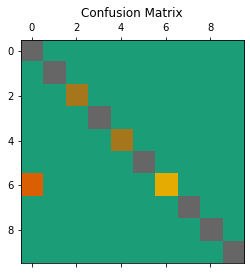

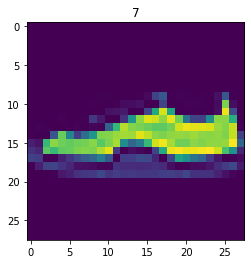

In [81]:
evaluate_model(model_fashion, X_test, y_test, stats)

Model prawidłowo zaklasyfikował obraz, jednakże ma kilka problemów.

Wyświetlone predykcje wskazują nam, że podany obraz, w dużym stopniu, przypominał modelowi obiekty z klas 3,4,6 tj. Dress, Coat, Shirt, co jest dosyć nietypowe. Dodatkowo Model często myli obiekty Shirt z T-Shirt oraz Pullover, jak widać na Confusion Matrix. Wydaje mi się to naturalne z powodu podobieństwa kroju tych ubrań. Warto sprawdzić jak wyglądają obiekty tych klas i zastanowić się w jaki sposób możemy pomóc modelowi je rozróżnić.

Model otrzymał wysoki wynik F1 Score, jednak można go znacznie poprawić.



Komentarz wyżej pisałem dzień wcześniej. Dzisiaj wyniki wyglądają innaczej, są lepsze i nie widać ewidentnych pomyłek modelu.

# Tworzenie nowych danych przy pomocy Albumentations

In [82]:
import albumentations as A

def albumentation(data):
    
    fliped_images = []
    
    for image in data:
        
        # Declare an augmentation pipeline
        transform = A.Compose([
        A.HorizontalFlip(p=1),
        A.GaussNoise(var_limit=(0.0001, 0.017), always_apply=True)
        ])
        
        transformed = transform(image=image)
        new_image = transformed['image']
        fliped_images.append(new_image)
        
        
        
    images_2 = np.array(fliped_images)
    
    return images_2

Tworzymy nowe obrazy z użyciem funkcji

In [83]:
train_2, test_2 = fashion_mnist.load_data()
images_2, labels_2 = train_2

images_2 = images_2/255.0

labels_2 = labels_2.astype(np.int32)

In [84]:
new_images = albumentation(images_2)

In [85]:
np.shape(new_images)

(60000, 28, 28)

Dzielimy dane ponownie

In [86]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(new_images, labels_2, test_size=0.1, random_state=10, stratify=labels_2)

In [87]:
train_ds_2 = tf.data.Dataset.from_tensor_slices((X_train_2, y_train_2))

In [88]:
train_ds_2 = train_ds_2.shuffle(1000).batch(32)

Trenujemy model

In [89]:
stats = model_fashion.fit(train_ds_2, epochs=10, verbose=1, callbacks=[cp_callback])

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4781 - accuracy: 0.8296
Epoch 2/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3831 - accuracy: 0.8593
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3578 - accuracy: 0.8682
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3413 - accuracy: 0.8739
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3283 - accuracy: 0.8791
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3188 - accuracy: 0.8822
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3086 - accuracy: 0.8848
Epoch 8/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2991 - accuracy: 0.8897
Epoch 9/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.2928 - accuracy: 0.8917
Epoch 10/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.286